# c-Si panel production

In [4]:
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as ba
import numpy as np

In [5]:
bd.projects.set_current("ecoinvent-3.11-cutoff-bw25")
bd.projects

Brightway2 projects manager with 7 objects:
	Another one bikes the dust
	Bicycle example
	USEEIO-1.1
	default
	ecoinvent-3.11-cutoff-bw25
	ecoinvent-3.12-cutoff
	electric_vehicle_standalone
Use `projects.report()` to get a report on all projects.

In [6]:
bi.restore_project_directory('/srv/data/brightway2-project-ecoinvent-3.11-cutoff-bw25-backup.tar.gz', overwrite_existing=True)

Restoring project backup archive - this could take a few minutes...
Restored project: ecoinvent-3.11-cutoff-bw25


'ecoinvent-3.11-cutoff-bw25'

In [7]:
# Adding the databases into the PV project
db = bd.Database("ecoinvent-3.11-cutoff")
db.register()

In [8]:
bd.databases

Databases dictionary with 2 object(s):
	ecoinvent-3.11-biosphere
	ecoinvent-3.11-cutoff

## Creating the nodes

In [9]:
# Creating the nodes for the PV module and PV module production
PV_module = db.new_node(
    name="c-Si PV module",
    unit="kWp",
    type=bd.labels.product_node_default,
)
PV_production = db.new_node(
    name="c-Si PV production",
    location="DE",
    type=bd.labels.process_node_default,
)
PV_EoL = db.new_node(
    name="c-Si PV EOL",
    location="DE",
    type=bd.labels.process_node_default,
)
PV_module.save()
PV_production.save()
PV_EoL.save()

In [10]:
# Getting nodes from ecoinvent
silicon_solar_grade= bd.get_node(id=246559704623259649, database="ecoinvent-3.11-cutoff")
aluminum_frame= bd.get_node(id=246559762810839042, database="ecoinvent-3.11-cutoff")
glass_front_sheet= bd.get_node(id=246559769777577986, database="ecoinvent-3.11-cutoff")
eva_encapsulant= bd.get_node(id=246559786403799041, database="ecoinvent-3.11-cutoff")
backsheet_pet= bd.get_node(id=246559722780401673, database="ecoinvent-3.11-cutoff")
copper_wiring= bd.get_node(id=246559703599849475, database="ecoinvent-3.11-cutoff")
silver_contacts= bd.get_node(id=246559770343809025, database="ecoinvent-3.11-cutoff")
junction_box= bd.get_node(id=246559767613317123, database="ecoinvent-3.11-cutoff")
electricity_mix= bd.get_node(id=246559746184617985, database="ecoinvent-3.11-cutoff")
heat_naturalgas= bd.get_node(id=246559730611167232, database="ecoinvent-3.11-cutoff")
all_transport= bd.get_node(id=246559732137893888, database="ecoinvent-3.11-cutoff")
silicon_kerf_loss= bd.get_node(id=246559763263823876, database="ecoinvent-3.11-cutoff")
waste_plastic = bd.get_node(id=246559782427598848, database="ecoinvent-3.11-cutoff")
waste_others = bd.get_node(id=246559740333563904, database="ecoinvent-3.11-cutoff")

## Creating the edges

In [11]:
import pandas as pd

# Step 1: Read the CSV file
# Replace 'your_file.csv' with your actual filename or path
dfi = pd.read_csv('material_inflows_PV.csv')
dfo = pd.read_csv('material_outflows_PV.csv')
capi = pd.read_csv('stockdriven_inflow_capacity.csv')
capo = pd.read_csv('stockdriven_outflow_capacity.csv')

# Step 2: Check the columns (optional, to confirm structure)
print(dfi.columns)

# Step 3: Convert each column into a separate list
Year = dfi['Year'].tolist()
Ag = dfi['Ag'].tolist()
Al = dfi['Al'].tolist()
Cu = dfi['Cu'].tolist()
Electrolyte = dfi['Electrolyte'].tolist()
Li = dfi['Li'].tolist()
PP = dfi['PP'].tolist()
Si = dfi['Si'].tolist()
Steel = dfi['Steel'].tolist()

Si_waste = dfo['Si'].tolist()
Ag_waste = dfo['Ag'].tolist()
Al_waste = dfo['Al'].tolist()
Cu_waste = dfo['Cu'].tolist()

inflow_capacity = capi['PV'].tolist()   # in kWp
outflow_capacity = capo['PV'].tolist()  # in kWp

inflow = [110, 21, 21, 21, 21, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 16, 16, 16, 16, 126]
inflow_capacity_base = np.array(inflow)*1e6       # in kWp
outflow = [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	110]
outflow_capacity_base = np.array(outflow)*1e6       # in kWp

Index(['Year', 'Ag', 'Al', 'Cu', 'Electrolyte', 'Li', 'PP', 'Si', 'Steel'], dtype='object')


In [12]:
# Defining the inventory update based on input data from MFA

def update_inventory_manufacturing(Time): 

    time_index = Year.index(Time)
   
    # Main production output
    PV_production.new_edge(
        amount=1,
        input=PV_module,
        type=bd.labels.production_edge_default,
        functional=True,
    ).save()
    
    # Material inputs    
    PV_production.new_edge(
        amount=Si[time_index]/(inflow_capacity[time_index]),
        input=silicon_solar_grade,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    PV_production.new_edge(
        amount=Al[time_index]/(inflow_capacity[time_index]),
        input=aluminum_frame,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=66,
        input=glass_front_sheet,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=3.3,
        input=eva_encapsulant,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=2.2,
        input=backsheet_pet,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=Cu[time_index]/(inflow_capacity[time_index]),
        input=copper_wiring,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=Ag[time_index]/(inflow_capacity[time_index]),
        input=silver_contacts,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=1.1/18.5,             # Junction box unit in piece, 18.5 kg/piece
        input=junction_box,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    
    # Energy
    PV_production.new_edge(
        amount=2200,
        input=electricity_mix,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()    
    PV_production.new_edge(
        amount=275,
        input=heat_naturalgas,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    
    # Transport
    PV_production.new_edge(
        amount=3850,
        input=all_transport,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()

def update_inventory_EoL(Time): 

    time_index = Year.index(Time)
    
    # Waste (manufacturing)
    PV_production.new_edge(
        amount=Si_waste[time_index]/(outflow_capacity[time_index]),
        input=silicon_kerf_loss,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()
    PV_production.new_edge(
        amount=(Ag_waste[time_index] + Al_waste[time_index] + Cu_waste[time_index])/(outflow_capacity[time_index]),
        input=waste_others,
        type=bd.labels.consumption_edge_default,
        functional=True,
    ).save()


GWP CALCULATIONS

In [13]:
GWP_per_kWp_by_year_manufacturing = {}

for i in Year:
    update_inventory_manufacturing(i)
    functional_unit = PV_module
    method_adp_minerals = (
        'ecoinvent-3.11',
        'CML v4.8 2016 no LT',
        'material resources: metals/minerals no LT',
        'abiotic depletion potential (ADP): elements (ultimate reserves) no LT'
    )
    impact_category=method_adp_minerals
    
    lca = bc.LCA({functional_unit: 1}, method=impact_category)
    lca.lci()
    lca.lcia()
    GWP_per_kWp_by_year_manufacturing[i] = lca.score

In [14]:
GWP_per_kWp_by_year_EoL = {}

for i in Year:
    update_inventory_EoL(i)
    functional_unit = PV_module
    method_adp_minerals = (
        'ecoinvent-3.11',
        'CML v4.8 2016 no LT',
        'material resources: metals/minerals no LT',
        'abiotic depletion potential (ADP): elements (ultimate reserves) no LT'
    )
    impact_category=method_adp_minerals
    
    lca = bc.LCA({functional_unit: 1}, method=impact_category)
    lca.lci()
    lca.lcia()
    GWP_per_kWp_by_year_EoL[i] = lca.score

In [15]:
GWP_per_kWp_by_year_manufacturing

{2025: 0.030587591126588223,
 2026: 0.030363734771005003,
 2027: 0.030142813895837672,
 2028: 0.029924782732196255,
 2029: 0.02970959913306837,
 2030: 0.02949721980544842,
 2031: 0.029287605064846147,
 2032: 0.029080712210919256,
 2033: 0.02887650231939566,
 2034: 0.028674934771028827,
 2035: 0.028475970937956858,
 2036: 0.02827957401514324,
 2037: 0.028085704125826567,
 2038: 0.02789432469755764,
 2039: 0.027705398586124263,
 2040: 0.027518892437202732,
 2041: 0.027334768176241284,
 2042: 0.02715299130946169,
 2043: 0.026973528377127888,
 2044: 0.026796344715093734,
 2045: 0.026621408114070023}

In [16]:
GWP_per_kWp_by_year_EoL

{2025: 0.02662114805054777,
 2026: 0.02662088798702551,
 2027: 0.026620627923503257,
 2028: 0.02662036785998101,
 2029: 0.02662010779646026,
 2030: 0.026619847733500117,
 2031: 0.026619587687345344,
 2032: 0.026619327790426008,
 2033: 0.02661906851700057,
 2034: 0.026618810845959753,
 2035: 0.026618556144688887,
 2036: 0.02661830582009003,
 2037: 0.026618060915879344,
 2038: 0.026617821888487266,
 2039: 0.026617588726728217,
 2040: 0.02661736122707709,
 2041: 0.02661713916142173,
 2042: 0.026616922337527087,
 2043: 0.026616710617348004,
 2044: 0.026616503931477263,
 2045: 0.026616302266227385}

In [17]:
GWP_per_kWp_by_year = {key: GWP_per_kWp_by_year_manufacturing[key] + GWP_per_kWp_by_year_EoL.get(key, 0) for key in GWP_per_kWp_by_year_manufacturing}

In [18]:
GWP_per_kWp_by_year

{2025: 0.057208739177135995,
 2026: 0.05698462275803051,
 2027: 0.056763441819340926,
 2028: 0.05654515059217727,
 2029: 0.05632970692952863,
 2030: 0.05611706753894854,
 2031: 0.05590719275219149,
 2032: 0.05570004000134526,
 2033: 0.05549557083639623,
 2034: 0.05529374561698858,
 2035: 0.05509452708264574,
 2036: 0.05489787983523327,
 2037: 0.05470376504170591,
 2038: 0.054512146586044904,
 2039: 0.05432298731285248,
 2040: 0.05413625366427982,
 2041: 0.053951907337663016,
 2042: 0.05376991364698878,
 2043: 0.05359023899447589,
 2044: 0.053412848646571,
 2045: 0.05323771038029741}

In [19]:
GWP_total_by_year_manufacturing = {key: value * factor for key, value, factor in zip(GWP_per_kWp_by_year_manufacturing.keys(), GWP_per_kWp_by_year_manufacturing.values(), inflow_capacity)}
GWP_total_by_year_EoL ={key: value * factor for key, value, factor in zip(GWP_per_kWp_by_year_EoL.keys(), GWP_per_kWp_by_year_EoL.values(), outflow_capacity)}
GWP_total_by_year = {key: GWP_total_by_year_manufacturing[key] + GWP_total_by_year_EoL.get(key, 0) for key in GWP_total_by_year_manufacturing}
GWP_total_by_year

{2025: 642878.8912419124,
 2026: 644631.5795444979,
 2027: 675155.3940562217,
 2028: 774489.5635308592,
 2029: 958867.9913914888,
 2030: 1189516.9410499805,
 2031: 1345289.4906273626,
 2032: 1504207.313721644,
 2033: 1603009.9785915413,
 2034: 1659217.9570949923,
 2035: 1697830.6869697382,
 2036: 1715376.65241864,
 2037: 1786780.2948900433,
 2038: 1888199.1622216515,
 2039: 2011188.475678834,
 2040: 2141827.6705984245,
 2041: 2211907.2868299214,
 2042: 2320544.877071538,
 2043: 2407091.7056977274,
 2044: 2473627.1288675563,
 2045: 2530178.7332072537}

In [20]:
first_key = next(iter(GWP_per_kWp_by_year_manufacturing))
base1_value_manufacturing = GWP_per_kWp_by_year_manufacturing[first_key]
Base1_GWP_total_by_year_manufacturing = {year: base1_value_manufacturing * factor for year, factor in zip(GWP_per_kWp_by_year_manufacturing.keys(), inflow_capacity_base)}

first_key_EoL = next(iter(GWP_per_kWp_by_year_EoL))
base1_value_EoL = GWP_per_kWp_by_year_EoL[first_key_EoL]
Base1_GWP_total_by_year_EoL = {year: base1_value_EoL * factor for year, factor in zip(GWP_per_kWp_by_year_EoL.keys(), outflow_capacity_base)}

Base1_GWP_total_by_year = {key: Base1_GWP_total_by_year_manufacturing[key] + Base1_GWP_total_by_year_EoL.get(key, 0) for key in Base1_GWP_total_by_year_manufacturing}
Base1_GWP_total_by_year

{2025: 3364635.0239247046,
 2026: 642339.4136583527,
 2027: 642339.4136583527,
 2028: 642339.4136583527,
 2029: 642339.4136583527,
 2030: 581164.2314051762,
 2031: 581164.2314051762,
 2032: 581164.2314051762,
 2033: 581164.2314051762,
 2034: 581164.2314051762,
 2035: 550576.640278588,
 2036: 550576.640278588,
 2037: 550576.640278588,
 2038: 550576.640278588,
 2039: 550576.640278588,
 2040: 550576.640278588,
 2041: 489401.4580254116,
 2042: 489401.4580254116,
 2043: 489401.4580254116,
 2044: 489401.4580254116,
 2045: 6782362.767510371}

In [21]:
first_key = next(iter(GWP_per_kWp_by_year_manufacturing))
base2_value_manufacturing = GWP_per_kWp_by_year_manufacturing[first_key]
Base2_GWP_total_by_year_manufacturing = {year: base2_value_manufacturing * factor for year, factor in zip(GWP_per_kWp_by_year_manufacturing.keys(), inflow_capacity)}

first_key_EoL = next(iter(GWP_per_kWp_by_year_EoL))
base2_value_EoL = GWP_per_kWp_by_year_EoL[first_key_EoL]
Base2_GWP_total_by_year_EoL = {year: base2_value_EoL * factor for year, factor in zip(GWP_per_kWp_by_year_EoL.keys(), outflow_capacity)}

Base2_GWP_total_by_year = {key: Base2_GWP_total_by_year_manufacturing[key] + Base2_GWP_total_by_year_EoL.get(key, 0) for key in Base2_GWP_total_by_year_manufacturing}
Base2_GWP_total_by_year

{2025: 642878.8912419124,
 2026: 649360.0665647304,
 2027: 684826.42329748,
 2028: 790122.7417157483,
 2029: 982533.0167195833,
 2030: 1223504.681504288,
 2031: 1388353.4523126548,
 2032: 1558615.1840165234,
 2033: 1668069.0303518246,
 2034: 1734153.3482316886,
 2035: 1782342.3329726302,
 2036: 1807700.5542837863,
 2037: 1890484.2098288247,
 2038: 2005245.25491936,
 2039: 2143414.675043312,
 2040: 2290510.116944043,
 2041: 2371074.045648593,
 2042: 2496122.781150223,
 2043: 2598306.715651367,
 2044: 2679610.9426318696,
 2045: 2750593.745718661}

In [22]:
Difference_GWP_total_lifetime = {key: Base2_GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in Base2_GWP_total_by_year}
Difference_GWP_total_material = {key: GWP_total_by_year[key] - Base2_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}
Difference_GWP_total_overall = {key: GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}

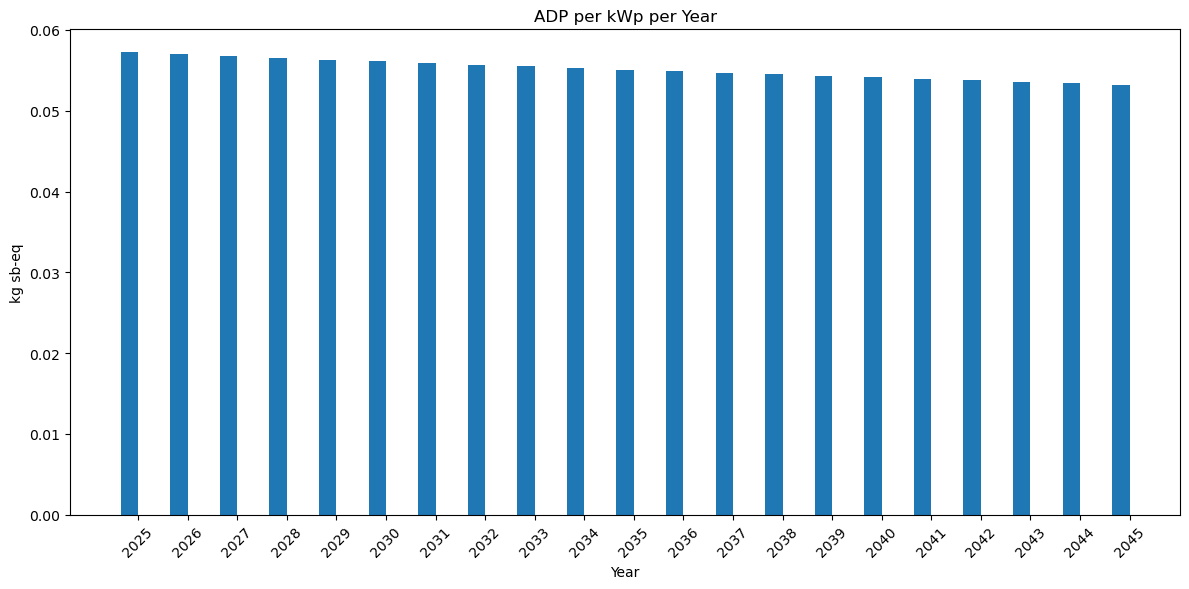

In [23]:
import matplotlib.pyplot as plt

# Extract years and values
years = list(GWP_per_kWp_by_year.keys())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(GWP_per_kWp_by_year.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP per kWp per Year')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()

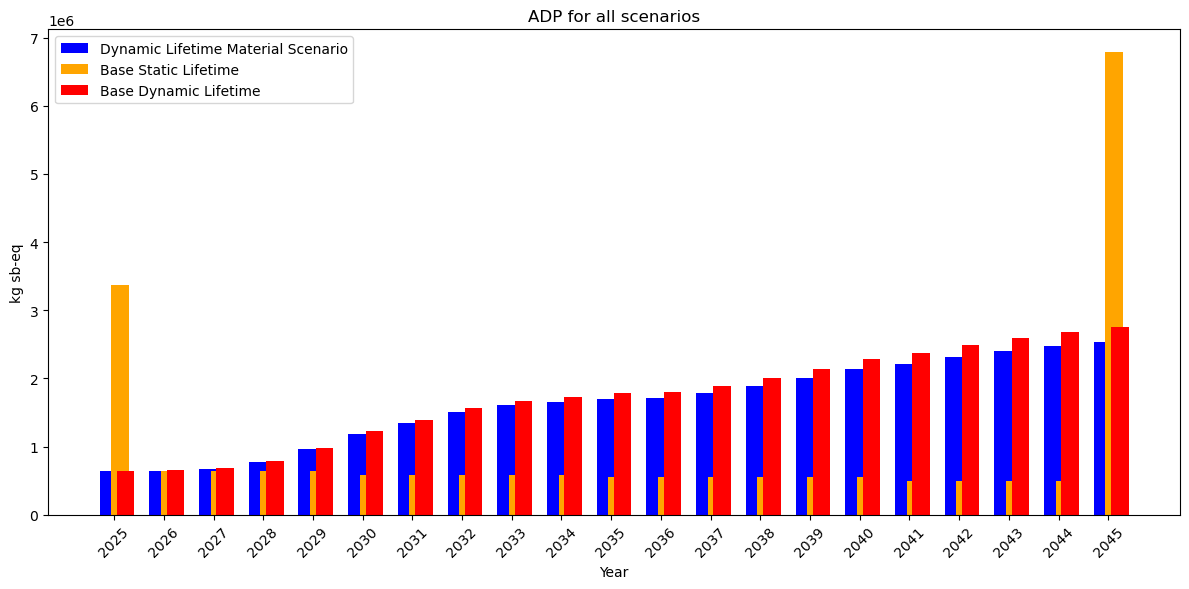

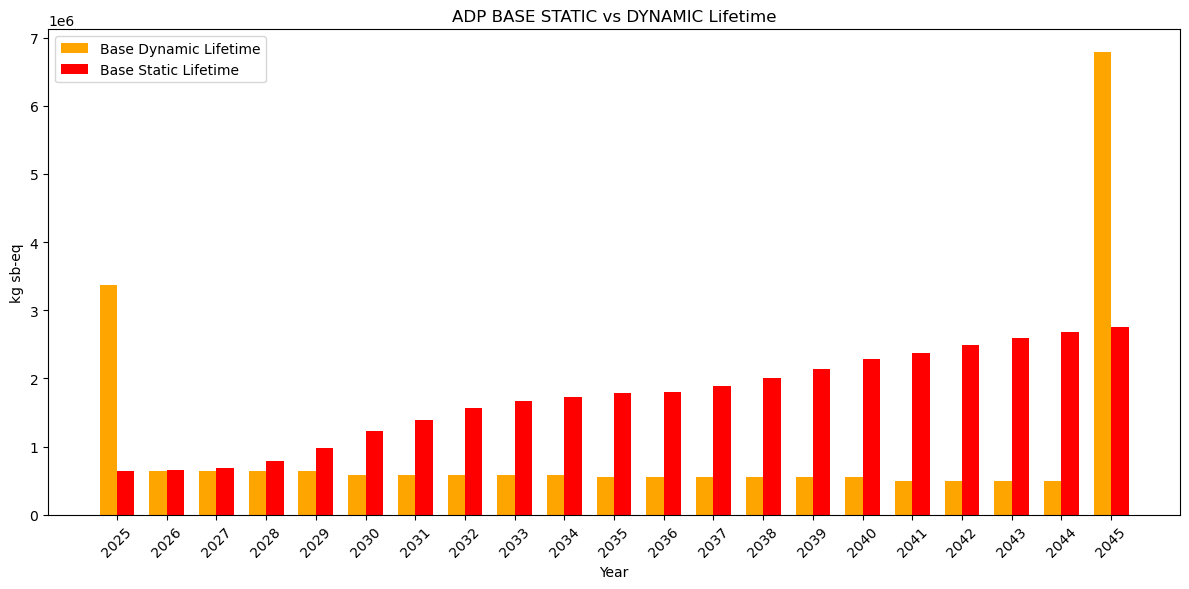

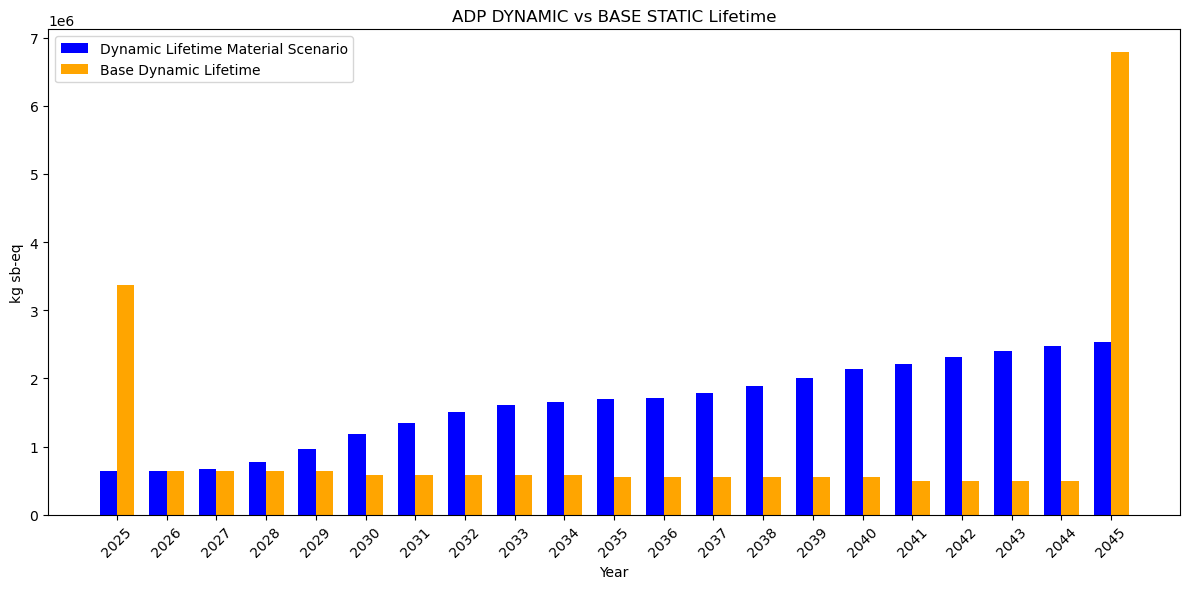

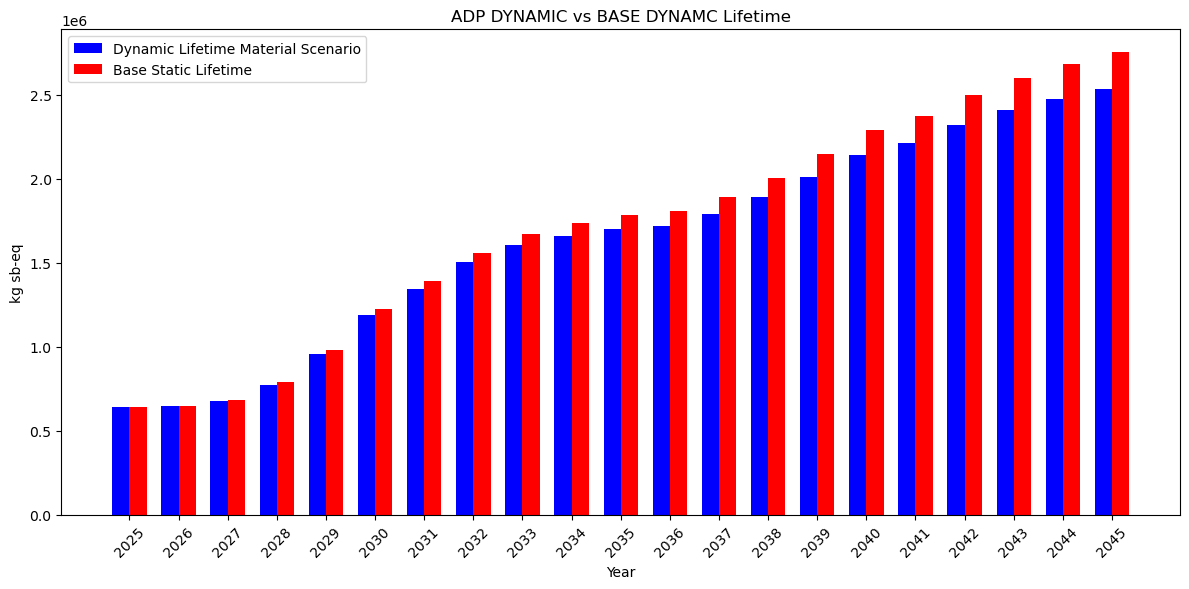

In [24]:
### ALL compared
# Extract values
values1 = list(GWP_total_by_year.values())
values2 = list(Base1_GWP_total_by_year.values())
values3 = list(Base2_GWP_total_by_year.values())


# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/3 for i in x], values1, width=bar_width, label='Dynamic Lifetime Material Scenario',color ='blue' )
plt.bar([i + bar_width/3 for i in x], values2, width=bar_width, label='Base Static Lifetime', color='orange')
plt.bar([i + 2*bar_width/3 for i in x], values3, width=bar_width, label='Base Dynamic Lifetime', color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP for all scenarios')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### GRAPH BASE 1 vs BASE 2
# Extract values
values1 = list(Base1_GWP_total_by_year.values())
values2 = list(Base2_GWP_total_by_year.values())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], values1, width=bar_width, label='Base Dynamic Lifetime', color='orange')
plt.bar([i + bar_width/2 for i in x], values2, width=bar_width, label='Base Static Lifetime', color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP BASE STATIC vs DYNAMIC Lifetime')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### GRAPH DYNAMIC VS BASE 1
# Extract values
values1 = list(GWP_total_by_year.values())

# Second dataset (baseline scenario): I wrote it constant 20000000000 manually for now
values2 = list(Base1_GWP_total_by_year.values())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], values1, width=bar_width, label='Dynamic Lifetime Material Scenario',color ='blue' )
plt.bar([i + bar_width/2 for i in x], values2, width=bar_width, label='Base Dynamic Lifetime', color='orange')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP DYNAMIC vs BASE STATIC Lifetime')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### GRAPH DYNAMIC VS BASE 2
# Extract values
values1 = list(GWP_total_by_year.values())
values2 = list(Base2_GWP_total_by_year.values())

# Bar width and positioning
bar_width = 0.35
x = range(len(years))

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], values1, width=bar_width, label='Dynamic Lifetime Material Scenario',color ='blue' )
plt.bar([i + bar_width/2 for i in x], values2, width=bar_width, label='Base Static Lifetime', color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP DYNAMIC vs BASE DYNAMC Lifetime')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

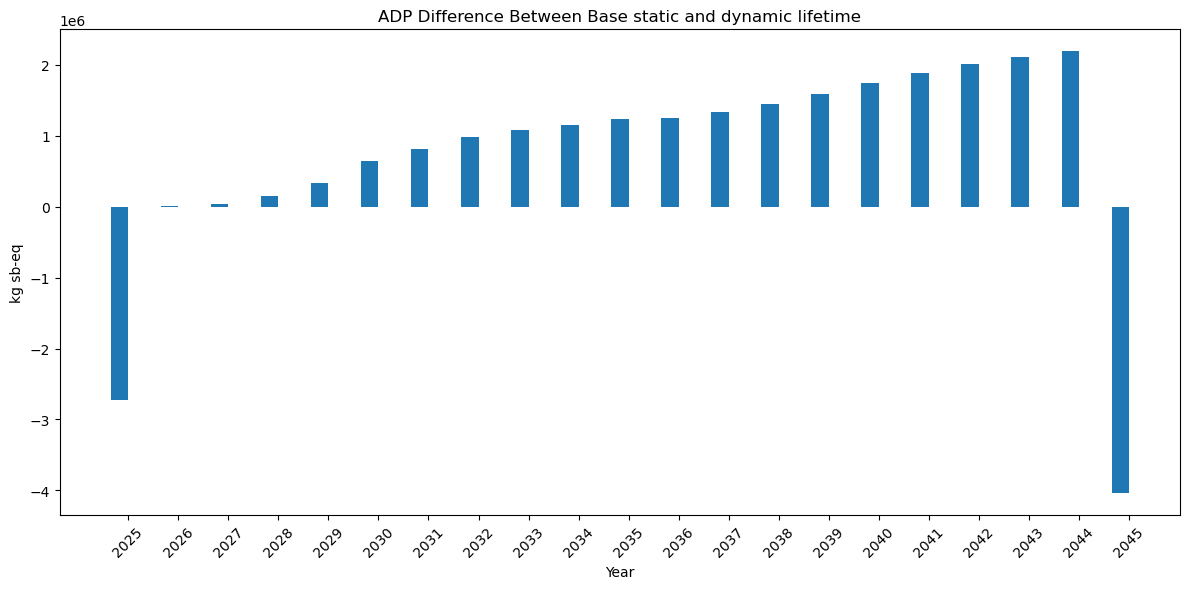

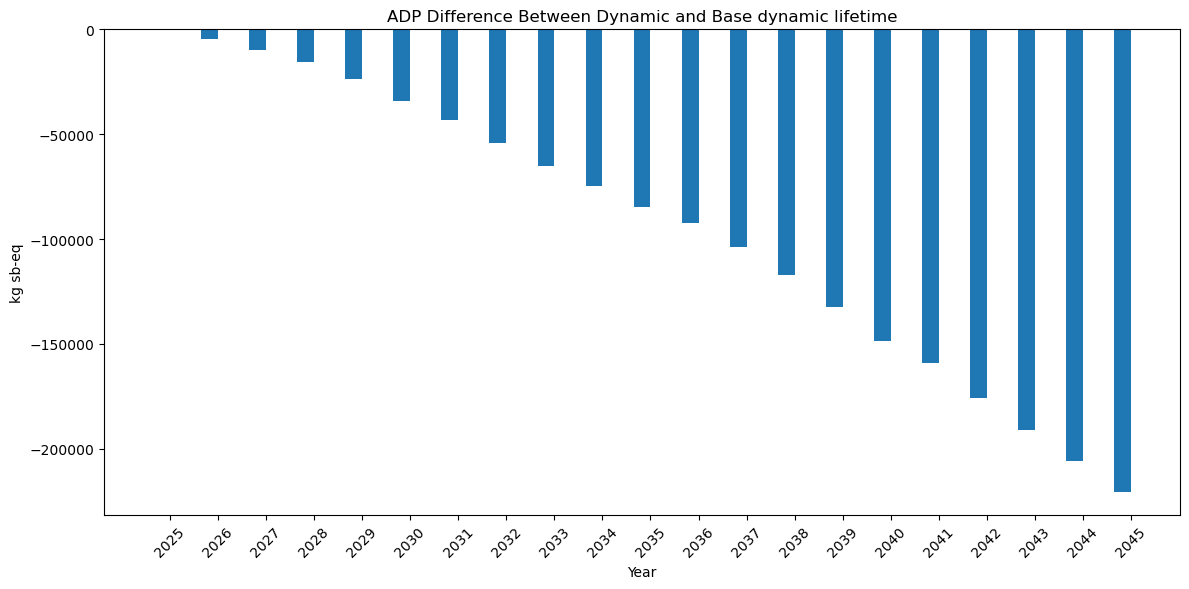

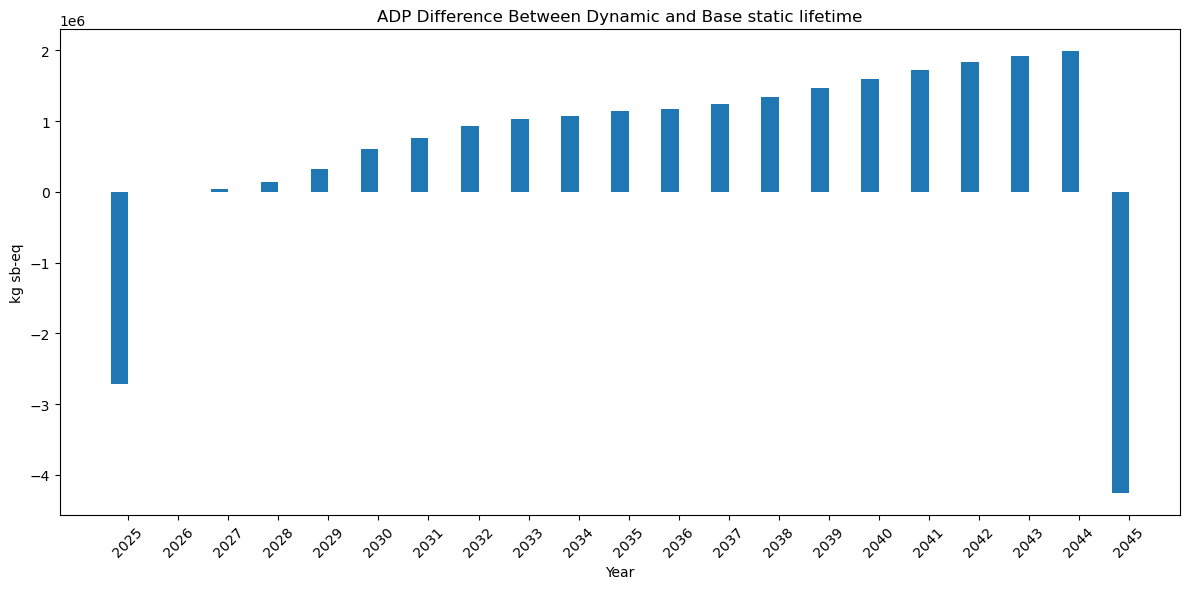

In [25]:
Difference_GWP_total_lifetime = {key: Base2_GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in Base2_GWP_total_by_year}
Difference_GWP_total_material = {key: GWP_total_by_year[key] - Base2_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}
Difference_GWP_total_overall = {key: GWP_total_by_year[key] - Base1_GWP_total_by_year.get(key, 0) for key in GWP_total_by_year}

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(Difference_GWP_total_lifetime.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP Difference Between Base static and dynamic lifetime')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(Difference_GWP_total_material.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP Difference Between Dynamic and Base dynamic lifetime')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()

# Plot bars side by side
plt.figure(figsize=(12,6))
plt.bar([i - bar_width/2 for i in x], list(Difference_GWP_total_overall.values()), width=bar_width)

# Labels and title
plt.xlabel('Year')
plt.ylabel('kg sb-eq')
plt.title('ADP Difference Between Dynamic and Base static lifetime')
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.show()